In [240]:
import itertools
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils 
from torch.autograd import Variable

from torchvision import transforms

import numpy as np
import pandas as pd

%matplotlib inline

In [241]:
df_label = pd.read_csv('./Platin_Data/patient.csv', sep = '\t', index_col = 0)

In [242]:
df_label

,PLATINUM_STATUS
ID,
TCGA-61-1910,Sensitive
TCGA-24-0982,Resistant
TCGA-36-1580,Resistant
TCGA-25-1321,Sensitive
TCGA-30-1892,Resistant
...,...
TCGA-04-1347,Sensitive
TCGA-24-0968,Sensitive
TCGA-30-1891,Resistant


In [243]:
df_label.loc[df_label['PLATINUM_STATUS'] == 'Sensitive', 'label'] = 1
df_label.loc[df_label['PLATINUM_STATUS'] == 'Resistant', 'label'] = 0

In [244]:
df_label

,PLATINUM_STATUS,label
ID,,
TCGA-61-1910,Sensitive,1.0
TCGA-24-0982,Resistant,0.0
TCGA-36-1580,Resistant,0.0
TCGA-25-1321,Sensitive,1.0
TCGA-30-1892,Resistant,0.0
...,...,...
TCGA-04-1347,Sensitive,1.0
TCGA-24-0968,Sensitive,1.0
TCGA-30-1891,Resistant,0.0


In [245]:
df_data = pd.read_csv('./Platin_Data/final_.csv', sep = '\t', index_col = 0)

In [246]:
df_data

,TCGA-61-1910,TCGA-24-0982,TCGA-36-1580,TCGA-25-1321,TCGA-30-1892,TCGA-61-1741,TCGA-13-0727,TCGA-04-1542,TCGA-61-1918,TCGA-25-1316,...,TCGA-04-1530,TCGA-13-0897,TCGA-09-1666,TCGA-25-2398,TCGA-20-1682,TCGA-04-1347,TCGA-24-0968,TCGA-30-1891,TCGA-09-0366,TCGA-13-0884
ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000015413,0.563384,0.172614,0.389207,0.072607,0.279721,0.433772,0.281011,0.067890,0.374432,0.216215,...,0.077356,0.028849,0.069302,0.156669,0.129739,0.076829,0.209148,0.178666,0.554952,0.063784
ENSG00000048545,0.007666,0.007190,0.027081,0.002315,0.057091,0.189098,0.035355,0.004330,0.004660,0.000000,...,0.125378,0.080959,0.014889,0.325469,0.024518,0.000000,0.013682,0.034186,0.032361,0.018597
ENSG00000069482,0.970585,0.395276,1.403594,0.308600,0.206074,0.615742,0.274869,0.678094,0.993677,1.225295,...,0.077361,0.846036,1.240228,1.940583,0.196062,0.319288,0.237050,0.772034,0.195435,0.784894
ENSG00000072657,0.003561,0.005010,0.008641,0.003129,0.133216,0.027408,0.000332,0.001463,0.001771,0.002958,...,0.105511,0.000000,0.000943,0.041478,0.001035,0.000491,0.009708,0.000481,0.000085,0.000393
ENSG00000078399,0.044476,0.090384,0.133845,0.004478,0.119614,0.058182,3.190913,0.000000,0.090121,39.109981,...,0.089808,0.135224,0.064789,1.004923,0.578497,0.033696,0.185222,0.110194,1.631170,0.035967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000278698,0.000000,0.270091,0.000000,0.521892,0.000000,0.322889,0.000000,0.000000,0.175048,15.130122,...,0.000000,0.000000,0.000000,0.000000,2.394687,0.000000,0.205584,0.000000,0.000000,0.000000
ENSG00000279834,0.894232,0.034947,0.000000,0.157563,0.000000,0.167113,0.038188,0.000000,0.407687,0.000000,...,0.270847,0.000000,0.036184,0.000000,0.238342,0.000000,0.000000,0.000000,0.058985,0.060262
ENSG00000279970,1.612154,0.311310,0.707253,2.033770,0.294278,0.584831,0.145792,0.589240,1.210576,0.259962,...,0.172338,0.091049,0.506526,0.070638,4.428358,0.071847,0.710875,0.000000,2.477118,0.191723


In [247]:
df_data_mod = df_data.T

In [248]:
df_data_mod

ID,ENSG00000015413,ENSG00000048545,ENSG00000069482,ENSG00000072657,ENSG00000078399,ENSG00000080572,ENSG00000100678,ENSG00000104435,ENSG00000104888,ENSG00000105146,...,ENSG00000274576,ENSG00000275756,ENSG00000276775,ENSG00000277247,ENSG00000278196,ENSG00000278698,ENSG00000279834,ENSG00000279970,ENSG00000280411,ENSG00000281880
TCGA-61-1910,0.563384,0.007666,0.970585,0.003561,0.044476,0.000000,0.000000,0.000000,0.043732,2.308592,...,0.000000,0.920597,0.000000,1.604301,0.299376,0.000000,0.894232,1.612154,0.761720,0.000000
TCGA-24-0982,0.172614,0.007190,0.395276,0.005010,0.090384,0.007062,0.000000,0.006438,0.082034,0.242661,...,24.797152,0.259035,4.625172,0.188089,4.211878,0.270091,0.034947,0.311310,0.357217,0.000000
TCGA-36-1580,0.389207,0.027081,1.403594,0.008641,0.133845,0.001970,0.002559,0.041762,0.074384,0.984290,...,4.017149,0.289083,0.893372,0.314861,4.817979,0.000000,0.000000,0.707253,15.996040,0.000000
TCGA-25-1321,0.072607,0.002315,0.308600,0.003129,0.004478,0.162223,0.000788,0.000000,0.101272,0.240456,...,2.576079,0.166843,0.000000,0.121147,1.356422,0.521892,0.157563,2.033770,1.495528,0.000000
TCGA-30-1892,0.279721,0.057091,0.206074,0.133216,0.119614,0.056072,0.000000,0.055381,0.280458,0.592872,...,1.058604,0.114269,2.825069,0.000000,3.716018,0.000000,0.000000,0.294278,1.890974,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-04-1347,0.076829,0.000000,0.319288,0.000491,0.033696,0.005704,0.000988,0.011701,0.060742,0.663423,...,0.000000,0.000000,0.000000,3.038608,0.567030,0.000000,0.000000,0.071847,4.616723,0.000000
TCGA-24-0968,0.209148,0.013682,0.237050,0.009708,0.185222,0.000000,0.000000,0.000000,0.307004,0.213121,...,15.221570,0.525782,4.332951,2.720169,31.845646,0.205584,0.000000,0.710875,6.117782,0.000000
TCGA-30-1891,0.178666,0.034186,0.772034,0.000481,0.110194,0.000000,0.000646,0.200678,0.000000,0.098616,...,47.331214,0.000000,2.631492,0.000000,65.568652,0.000000,0.000000,0.000000,80.395413,0.000000
TCGA-09-0366,0.554952,0.032361,0.195435,0.000085,1.631170,0.026487,0.001376,0.006339,0.303848,0.703636,...,0.225023,0.534375,0.100086,1.481522,3.712525,0.000000,0.058985,2.477118,0.602935,0.001573


In [249]:
df = pd.concat([df_label,df_data_mod], axis = 1)

In [250]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size = 0.05)

In [251]:
train

,PLATINUM_STATUS,label,ENSG00000015413,ENSG00000048545,ENSG00000069482,ENSG00000072657,ENSG00000078399,ENSG00000080572,ENSG00000100678,ENSG00000104435,...,ENSG00000274576,ENSG00000275756,ENSG00000276775,ENSG00000277247,ENSG00000278196,ENSG00000278698,ENSG00000279834,ENSG00000279970,ENSG00000280411,ENSG00000281880
ID,,,,,,,,,,,,,,,,,,,,,
TCGA-13-0887,Sensitive,1.0,0.180335,0.000000,1.517220,0.000199,0.205335,0.006179,0.000401,0.020070,...,0.131246,9.803631,0.000000,0.000000,9.859221,0.797677,0.000000,0.379439,10.901581,0.002753
TCGA-23-1023,Sensitive,1.0,0.233199,0.013836,0.258162,0.003740,0.010703,0.001812,0.000471,0.009911,...,2.001111,0.199391,0.684656,0.000000,2.809800,0.311852,0.026900,2.088200,10.861177,0.000359
TCGA-24-2024,Sensitive,1.0,0.067817,0.019378,0.986929,0.001169,0.412242,0.030814,0.000942,0.003718,...,0.923946,0.465425,1.780792,0.144837,10.270544,0.000000,0.000000,0.787658,120.756921,0.000000
TCGA-13-1499,Sensitive,1.0,0.417358,0.017563,1.916526,0.004821,0.046705,0.012937,0.013819,0.124833,...,254.998247,0.000000,31.179057,0.114865,292.114557,0.000000,0.021342,0.787624,221.751276,0.000000
TCGA-29-1785,Sensitive,1.0,0.043496,0.022194,6.223946,0.038586,0.014307,0.002422,0.000000,0.000000,...,5.761369,0.088843,1.098230,13.160105,3.322537,0.000000,0.179789,0.137279,24.809811,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-24-1924,Resistant,0.0,0.259551,0.051882,0.382126,0.000461,0.084496,0.008940,0.001394,0.003668,...,32.506056,0.196756,26.213597,0.000000,137.567099,0.205154,0.053089,0.101341,158.051447,0.000000
TCGA-20-1682,Sensitive,1.0,0.129739,0.024518,0.196062,0.001035,0.578497,0.000000,0.001668,0.002195,...,14.729881,0.235555,65.030133,4.104954,48.067724,2.394687,0.238342,4.428358,12.668665,0.000636
TCGA-09-0369,Resistant,0.0,5.851765,0.023373,1.187606,0.009131,0.107356,0.005739,0.000497,0.378025,...,0.162520,0.070172,0.433712,0.000000,0.228197,0.000000,0.170405,0.180713,0.725768,0.000000


In [252]:
train.to_csv("train_platin.csv", mode='w')

In [253]:
val

,PLATINUM_STATUS,label,ENSG00000015413,ENSG00000048545,ENSG00000069482,ENSG00000072657,ENSG00000078399,ENSG00000080572,ENSG00000100678,ENSG00000104435,...,ENSG00000274576,ENSG00000275756,ENSG00000276775,ENSG00000277247,ENSG00000278196,ENSG00000278698,ENSG00000279834,ENSG00000279970,ENSG00000280411,ENSG00000281880
ID,,,,,,,,,,,,,,,,,,,,,
TCGA-25-1628,Resistant,0.0,5.615824,0.065165,0.337751,0.043117,0.294068,0.016593,0.007391,0.008104,...,40.680252,0.347815,5.016083,0.189415,138.558353,0.000000,0.105579,0.716583,120.331807,0.000469
TCGA-04-1364,Resistant,0.0,0.702024,0.923524,4.072661,0.001147,0.118197,0.111158,0.001733,0.000000,...,0.000000,0.000000,0.168013,0.710578,0.000000,0.000000,0.033006,0.588046,0.000000,0.000000
TCGA-23-1022,Sensitive,1.0,0.851551,0.000000,0.436859,0.000386,0.141528,0.003993,0.000519,0.006826,...,0.339231,0.000000,0.000000,0.000000,1.309884,11.912389,0.000000,0.377207,0.605965,0.000000
TCGA-13-1489,Sensitive,1.0,0.010517,0.018782,3.978230,0.001360,0.036323,0.079056,0.018714,0.001201,...,0.149253,0.322218,0.265538,0.140380,4.296168,0.403165,0.052165,1.062154,3.999138,0.004869
TCGA-23-1110,Sensitive,1.0,0.237107,0.000000,0.230347,0.058881,0.000000,0.113166,0.001960,0.000000,...,0.000000,0.276746,0.000000,0.000000,0.449986,3.462697,0.448033,1.140326,0.000000,0.000000
TCGA-23-1119,Sensitive,1.0,0.261206,0.000000,0.707750,0.002111,0.064441,0.092722,0.001417,0.000000,...,6.718942,1.500550,0.412199,0.217914,96.456595,0.312920,0.000000,0.515249,982.093083,0.000000
TCGA-25-2404,Sensitive,1.0,1.634044,0.099767,0.356160,0.006170,0.158494,0.039661,0.000000,0.089335,...,15.856511,5.391562,7.228961,3.169198,15.724269,0.000000,0.034637,0.396711,12.568923,0.000000
TCGA-36-1576,Sensitive,1.0,0.939258,0.093811,0.502835,0.005340,0.110436,0.005341,0.001388,0.007305,...,25.184871,0.195931,109.191389,0.000000,59.256235,1.225763,0.000000,0.353207,2429.932426,0.000000
TCGA-29-2428,Sensitive,1.0,0.242705,0.023588,0.261984,0.000996,0.038017,0.000000,0.002675,0.001760,...,21.213342,2.643941,1178.725545,0.000000,130.813125,0.000000,0.000000,0.048635,1178.790653,0.000510


In [254]:
val.to_csv("val_platin.csv", mode='w')

In [255]:
train = pd.read_csv("train_platin.csv")
val = pd.read_csv("val_platin.csv")

In [256]:
trn_X_pd = train.iloc[:,3:]
trn_y_pd = train.iloc[:,2]

val_X_pd = val.iloc[:,3:]
val_y_pd = val.iloc[:,2]

In [257]:
val_X_pd

,ENSG00000015413,ENSG00000048545,ENSG00000069482,ENSG00000072657,ENSG00000078399,ENSG00000080572,ENSG00000100678,ENSG00000104435,ENSG00000104888,ENSG00000105146,...,ENSG00000274576,ENSG00000275756,ENSG00000276775,ENSG00000277247,ENSG00000278196,ENSG00000278698,ENSG00000279834,ENSG00000279970,ENSG00000280411,ENSG00000281880
0,5.615824,0.065165,0.337751,0.043117,0.294068,0.016593,0.007391,0.008104,0.254722,1.409839,...,40.680252,0.347815,5.016083,0.189415,138.558353,0.000000,0.105579,0.716583,120.331807,0.000469
1,0.702024,0.923524,4.072661,0.001147,0.118197,0.111158,0.001733,0.000000,22.365523,0.423113,...,0.000000,0.000000,0.168013,0.710578,0.000000,0.000000,0.033006,0.588046,0.000000,0.000000
2,0.851551,0.000000,0.436859,0.000386,0.141528,0.003993,0.000519,0.006826,0.023193,0.253315,...,0.339231,0.000000,0.000000,0.000000,1.309884,11.912389,0.000000,0.377207,0.605965,0.000000
3,0.010517,0.018782,3.978230,0.001360,0.036323,0.079056,0.018714,0.001201,0.086737,0.195042,...,0.149253,0.322218,0.265538,0.140380,4.296168,0.403165,0.052165,1.062154,3.999138,0.004869
4,0.237107,0.000000,0.230347,0.058881,0.000000,0.113166,0.001960,0.000000,0.109554,0.538447,...,0.000000,0.276746,0.000000,0.000000,0.449986,3.462697,0.448033,1.140326,0.000000,0.000000
5,0.261206,0.000000,0.707750,0.002111,0.064441,0.092722,0.001417,0.000000,0.269286,0.281140,...,6.718942,1.500550,0.412199,0.217914,96.456595,0.312920,0.000000,0.515249,982.093083,0.000000
6,1.634044,0.099767,0.356160,0.006170,0.158494,0.039661,0.000000,0.089335,0.155840,1.147058,...,15.856511,5.391562,7.228961,3.169198,15.724269,0.000000,0.034637,0.396711,12.568923,0.000000
7,0.939258,0.093811,0.502835,0.005340,0.110436,0.005341,0.001388,0.007305,0.224930,0.487103,...,25.184871,0.195931,109.191389,0.000000,59.256235,1.225763,0.000000,0.353207,2429.932426,0.000000
8,0.242705,0.023588,0.261984,0.000996,0.038017,0.000000,0.002675,0.001760,0.523320,1.224798,...,21.213342,2.643941,1178.725545,0.000000,130.813125,0.000000,0.000000,0.048635,1178.790653,0.000510
9,0.432946,0.082841,1.508914,0.003499,0.245662,0.643671,0.007516,0.042035,0.147029,1.376452,...,5.837102,0.397943,4.099297,0.000000,6.686206,0.000000,0.161061,1.708040,44.725310,0.000000


In [258]:
trn_X_pd

,ENSG00000015413,ENSG00000048545,ENSG00000069482,ENSG00000072657,ENSG00000078399,ENSG00000080572,ENSG00000100678,ENSG00000104435,ENSG00000104888,ENSG00000105146,...,ENSG00000274576,ENSG00000275756,ENSG00000276775,ENSG00000277247,ENSG00000278196,ENSG00000278698,ENSG00000279834,ENSG00000279970,ENSG00000280411,ENSG00000281880
0,0.180335,0.000000,1.517220,0.000199,0.205335,0.006179,0.000401,0.020070,0.044866,0.294017,...,0.131246,9.803631,0.000000,0.000000,9.859221,0.797677,0.000000,0.379439,10.901581,0.002753
1,0.233199,0.013836,0.258162,0.003740,0.010703,0.001812,0.000471,0.009911,0.068407,0.143682,...,2.001111,0.199391,0.684656,0.000000,2.809800,0.311852,0.026900,2.088200,10.861177,0.000359
2,0.067817,0.019378,0.986929,0.001169,0.412242,0.030814,0.000942,0.003718,0.084226,0.229981,...,0.923946,0.465425,1.780792,0.144837,10.270544,0.000000,0.000000,0.787658,120.756921,0.000000
3,0.417358,0.017563,1.916526,0.004821,0.046705,0.012937,0.013819,0.124833,0.091846,0.592770,...,254.998247,0.000000,31.179057,0.114865,292.114557,0.000000,0.021342,0.787624,221.751276,0.000000
4,0.043496,0.022194,6.223946,0.038586,0.014308,0.002422,0.000000,0.000000,0.049238,0.653014,...,5.761369,0.088843,1.098230,13.160105,3.322537,0.000000,0.179789,0.137279,24.809811,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.259551,0.051882,0.382126,0.000461,0.084496,0.008940,0.001394,0.003668,0.410213,1.049200,...,32.506056,0.196756,26.213597,0.000000,137.567099,0.205154,0.053089,0.101341,158.051447,0.000000
199,0.129739,0.024518,0.196062,0.001035,0.578497,0.000000,0.001668,0.002195,0.083923,0.305536,...,14.729881,0.235555,65.030133,4.104954,48.067724,2.394687,0.238342,4.428358,12.668665,0.000636
200,5.851765,0.023373,1.187606,0.009131,0.107356,0.005739,0.000497,0.378025,0.688905,1.653515,...,0.162520,0.070172,0.433712,0.000000,0.228197,0.000000,0.170405,0.180713,0.725768,0.000000
201,1.398956,0.000000,0.063108,0.045295,0.013736,0.021703,0.008458,0.067840,0.022511,0.479432,...,0.000000,0.113729,0.000000,0.000000,0.000000,0.000000,0.023015,0.205021,0.000000,0.000000


In [259]:
trn_X = torch.from_numpy(trn_X_pd.astype(float).values)
trn_y = torch.from_numpy(trn_y_pd.astype(float).values)

val_X = torch.from_numpy(val_X_pd.astype(float).values)
val_y = torch.from_numpy(val_y_pd.astype(float).values)

In [260]:
batch_size = 32

In [261]:
trn = data_utils.TensorDataset(trn_X, trn_y)
trn_loader = data_utils.DataLoader(trn, batch_size=batch_size, shuffle=True)

val = data_utils.TensorDataset(val_X, val_y)
val_loader = data_utils.DataLoader(val, batch_size=batch_size, shuffle=False)

In [262]:
tmp = next(iter(trn_loader))

In [263]:
tmp

[tensor([[2.3230e-01, 9.6578e-02, 3.0863e+00,  ..., 2.9326e+00, 1.7449e+01,
          0.0000e+00],
         [3.8921e-01, 2.7081e-02, 1.4036e+00,  ..., 7.0725e-01, 1.5996e+01,
          0.0000e+00],
         [4.7446e-01, 2.8821e-02, 1.6997e+00,  ..., 2.1392e-01, 2.1493e+02,
          0.0000e+00],
         ...,
         [2.2048e-01, 8.2213e-02, 2.8834e-01,  ..., 2.0876e+00, 6.6644e+00,
          0.0000e+00],
         [2.1637e-01, 3.1543e-02, 2.8077e+00,  ..., 1.0034e+00, 1.1396e+02,
          0.0000e+00],
         [1.0487e-01, 2.0385e-02, 4.8395e-01,  ..., 1.7338e+00, 5.3172e+00,
          0.0000e+00]], dtype=torch.float64),
 tensor([1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
         1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        dtype=torch.float64)]

In [264]:
# for dictionary batch
class Dataset(data_utils.Dataset):
   
    def __init__(self, X, y):
        self.X = X
        self.y = y
   
    def __getitem__(self, idx):
        return {'X': self.X[idx], 'y': self.y[idx]}
   
    def __len__(self):
        return len(self.X)


In [265]:
trn = Dataset(trn_X, trn_y)
trn_loader = data_utils.DataLoader(trn, batch_size=batch_size, shuffle=True)

val = Dataset(val_X, val_y)
val_loader = data_utils.DataLoader(val, batch_size=batch_size, shuffle=False)

In [266]:
tmp = next(iter(trn_loader))

In [267]:
tmp

{'X': tensor([[5.0154e-02, 5.6057e-02, 6.3342e-01,  ..., 3.6181e-01, 1.1867e+01,
          0.0000e+00],
         [4.7276e-01, 3.6488e-02, 1.6210e-01,  ..., 6.7709e-01, 1.1454e+03,
          0.0000e+00],
         [7.2479e-02, 1.3697e-02, 1.3417e+00,  ..., 1.1861e+00, 4.0831e-01,
          7.1024e-04],
         ...,
         [4.7758e-01, 2.3051e-02, 2.3370e+00,  ..., 3.2183e+00, 0.0000e+00,
          0.0000e+00],
         [3.4828e-02, 1.1847e-02, 2.6711e+00,  ..., 1.0894e+01, 8.0443e+00,
          0.0000e+00],
         [2.6053e-01, 9.8120e-02, 1.5292e+00,  ..., 4.3072e-01, 1.8871e+00,
          0.0000e+00]], dtype=torch.float64),
 'y': tensor([1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
         1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.],
        dtype=torch.float64)}

In [268]:
num_batches = len(trn_loader)

## Build Model

In [269]:
use_cuda = torch.cuda.is_available()

In [270]:
class MLPRegressor(nn.Module):
    
    def __init__(self):
        super(MLPRegressor, self).__init__()
        h1 = nn.Linear((len(train.columns)-3), 32)
        h2 = nn.Linear(32, 16)
        h3 = nn.Linear(16, 1)
        self.hidden = nn.Sequential(
            h1,
            nn.Tanh(),
            h2,
            nn.Tanh(),
            h3,
        )
        if use_cuda:
            self.hidden = self.hidden.cuda()
        
    def forward(self, x):
        o = self.hidden(x)
        return o.view(-1)

## Train model

In [291]:
model = MLPRegressor()

In [292]:
criterion = nn.MSELoss()
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [293]:
num_epochs = 100
num_batches = len(trn_loader) # requier modification

In [294]:
num_batches

7

In [295]:
trn_loss_list = []
val_loss_list = []

for epoch in range(num_epochs):
    trn_loss_summary = 0.0
    for i, trn in enumerate(trn_loader):
        trn_X, trn_y = trn['X'], trn['y']
        if use_cuda:
            trn_X, trn_y = trn_X.cuda(), trn_y.cuda()
        trn_X, trn_y = trn_X.float(), trn_y.float()
        optimizer.zero_grad()
        trn_pred = model(trn_X)
        trn_loss = criterion(trn_pred, trn_y)
        trn_loss.backward()
        optimizer.step()
        
        trn_loss_summary += trn_loss
        
        if (i+1) % 2 == 0:
            with torch.no_grad():
                val_loss_summary = 0.0
                for j, val in enumerate(val_loader):
                    val_X, val_y = val['X'], val['y']
                    if use_cuda:
                        val_X, val_y = val_X.cuda(), val_y.cuda()
                    val_X, val_y = val_X.float(), val_y.float()
                    val_pred = model(val_X)
                    val_loss = criterion(val_pred, val_y)
                    val_loss_summary += val_loss
                
            print("epoch: {}/{} | step: {}/{} | trn_loss: {:.4f} | val_loss: {:.4f}".format(
                epoch + 1, num_epochs, i+1, num_batches, (trn_loss_summary/15)**(1/2), (val_loss_summary/len(val_loader))**(1/2)
            ))
                
            trn_loss_list.append((trn_loss_summary/15)**(1/2))
            val_loss_list.append((val_loss_summary/len(val_loader))**(1/2))
            trn_loss_summary = 0.0
        
print("finish Training")

epoch: 1/100 | step: 2/7 | trn_loss: 0.2901 | val_loss: 0.7552
epoch: 1/100 | step: 4/7 | trn_loss: 0.2492 | val_loss: 0.6407
epoch: 1/100 | step: 6/7 | trn_loss: 0.2155 | val_loss: 0.5876
epoch: 2/100 | step: 2/7 | trn_loss: 0.1815 | val_loss: 0.5075
epoch: 2/100 | step: 4/7 | trn_loss: 0.1729 | val_loss: 0.4821
epoch: 2/100 | step: 6/7 | trn_loss: 0.1673 | val_loss: 0.4608
epoch: 3/100 | step: 2/7 | trn_loss: 0.1522 | val_loss: 0.4449
epoch: 3/100 | step: 4/7 | trn_loss: 0.1719 | val_loss: 0.4390
epoch: 3/100 | step: 6/7 | trn_loss: 0.1684 | val_loss: 0.4306
epoch: 4/100 | step: 2/7 | trn_loss: 0.1762 | val_loss: 0.4284
epoch: 4/100 | step: 4/7 | trn_loss: 0.1572 | val_loss: 0.4268
epoch: 4/100 | step: 6/7 | trn_loss: 0.1511 | val_loss: 0.4260
epoch: 5/100 | step: 2/7 | trn_loss: 0.1560 | val_loss: 0.4270
epoch: 5/100 | step: 4/7 | trn_loss: 0.1516 | val_loss: 0.4286
epoch: 5/100 | step: 6/7 | trn_loss: 0.1611 | val_loss: 0.4300
epoch: 6/100 | step: 2/7 | trn_loss: 0.1572 | val_loss:

epoch: 49/100 | step: 4/7 | trn_loss: 0.1093 | val_loss: 0.4310
epoch: 49/100 | step: 6/7 | trn_loss: 0.1162 | val_loss: 0.4467
epoch: 50/100 | step: 2/7 | trn_loss: 0.1106 | val_loss: 0.4348
epoch: 50/100 | step: 4/7 | trn_loss: 0.1266 | val_loss: 0.4098
epoch: 50/100 | step: 6/7 | trn_loss: 0.1157 | val_loss: 0.4217
epoch: 51/100 | step: 2/7 | trn_loss: 0.0970 | val_loss: 0.4156
epoch: 51/100 | step: 4/7 | trn_loss: 0.1313 | val_loss: 0.3973
epoch: 51/100 | step: 6/7 | trn_loss: 0.1217 | val_loss: 0.3764
epoch: 52/100 | step: 2/7 | trn_loss: 0.1206 | val_loss: 0.3803
epoch: 52/100 | step: 4/7 | trn_loss: 0.0966 | val_loss: 0.3819
epoch: 52/100 | step: 6/7 | trn_loss: 0.1194 | val_loss: 0.3947
epoch: 53/100 | step: 2/7 | trn_loss: 0.1039 | val_loss: 0.4048
epoch: 53/100 | step: 4/7 | trn_loss: 0.1314 | val_loss: 0.4057
epoch: 53/100 | step: 6/7 | trn_loss: 0.1041 | val_loss: 0.4034
epoch: 54/100 | step: 2/7 | trn_loss: 0.1400 | val_loss: 0.4040
epoch: 54/100 | step: 4/7 | trn_loss: 0.

epoch: 97/100 | step: 6/7 | trn_loss: 0.1268 | val_loss: 0.4236
epoch: 98/100 | step: 2/7 | trn_loss: 0.0921 | val_loss: 0.4222
epoch: 98/100 | step: 4/7 | trn_loss: 0.1122 | val_loss: 0.4206
epoch: 98/100 | step: 6/7 | trn_loss: 0.1234 | val_loss: 0.4256
epoch: 99/100 | step: 2/7 | trn_loss: 0.0992 | val_loss: 0.4292
epoch: 99/100 | step: 4/7 | trn_loss: 0.1147 | val_loss: 0.4310
epoch: 99/100 | step: 6/7 | trn_loss: 0.1114 | val_loss: 0.4329
epoch: 100/100 | step: 2/7 | trn_loss: 0.1097 | val_loss: 0.4255
epoch: 100/100 | step: 4/7 | trn_loss: 0.1163 | val_loss: 0.4252
epoch: 100/100 | step: 6/7 | trn_loss: 0.1116 | val_loss: 0.4251
finish Training


# Visualization

Text(0, 0.5, 'loss')

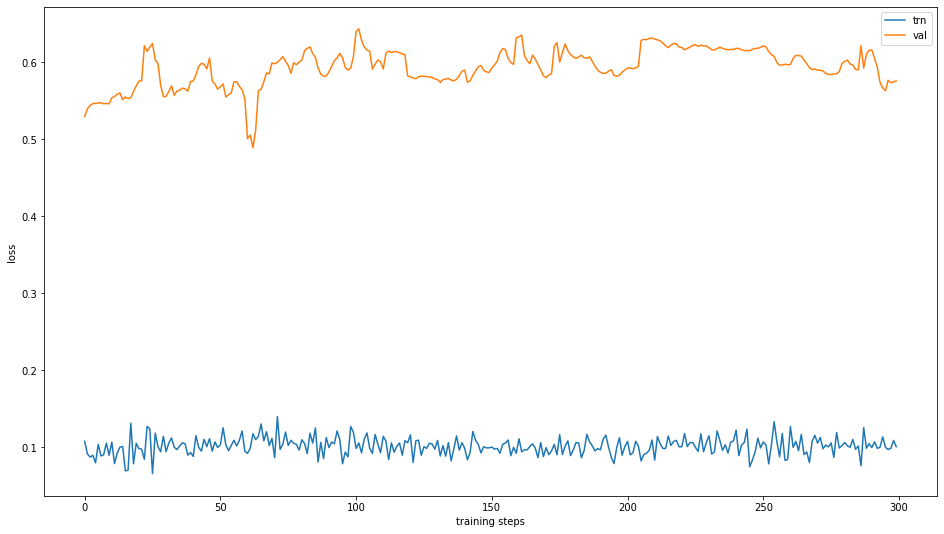

In [143]:
plt.figure(figsize=(16,9))
x_range = range(len(trn_loss_list))
plt.plot(x_range, trn_loss_list, label="trn")
plt.plot(x_range, val_loss_list, label="val")
plt.legend()
plt.xlabel("training steps")
plt.ylabel("loss")

## Transfer Learning

## Train model

In [77]:
model = MLPRegressor()

NameError: name 'X_features' is not defined

In [78]:
criterion = nn.MSELoss()
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

NameError: name 'model' is not defined

In [44]:
batch_size = 32

In [45]:
trn = data_utils.TensorDataset(trn_X, trn_y)
trn_loader = data_utils.DataLoader(trn, batch_size=batch_size, shuffle=True)

val = data_utils.TensorDataset(val_X, val_y)
val_loader = data_utils.DataLoader(val, batch_size=batch_size, shuffle=False)

NameError: name 'val_X' is not defined

In [13]:
trn_X_pd = df2_mod.iloc[:,2:]

In [14]:
trn_X_pd

ID,ENSG00000069482,ENSG00000072657,ENSG00000078399,ENSG00000080572,ENSG00000100678,ENSG00000104435,ENSG00000104888,ENSG00000105146,ENSG00000109321,ENSG00000112499,...,ENSG00000274576,ENSG00000275756,ENSG00000276775,ENSG00000277247,ENSG00000278196,ENSG00000278698,ENSG00000279834,ENSG00000279970,ENSG00000280411,ENSG00000281880
TCGA-61-1910,0.970585,0.003561,0.044476,0.000000,0.000000,0.000000,0.043732,2.308592,1.014494,0.000000,...,0.000000,0.920597,0.000000,1.604301,0.299376,0.000000,0.894232,1.612154,0.761720,0.000000
TCGA-24-0982,0.395276,0.005010,0.090384,0.007062,0.000000,0.006438,0.082034,0.242661,0.691196,0.004156,...,24.797152,0.259035,4.625172,0.188089,4.211878,0.270091,0.034947,0.311310,0.357217,0.000000
TCGA-36-1580,1.403594,0.008641,0.133845,0.001970,0.002559,0.041762,0.074384,0.984290,2.329158,0.001391,...,4.017149,0.289083,0.893372,0.314861,4.817979,0.000000,0.000000,0.707253,15.996040,0.000000
TCGA-25-1321,0.308600,0.003129,0.004478,0.162223,0.000788,0.000000,0.101272,0.240456,1.740308,0.004819,...,2.576079,0.166843,0.000000,0.121147,1.356422,0.521892,0.157563,2.033770,1.495528,0.000000
TCGA-30-1892,0.206074,0.133216,0.119614,0.056072,0.000000,0.055381,0.280458,0.592872,0.914734,0.004400,...,1.058604,0.114269,2.825069,0.000000,3.716018,0.000000,0.000000,0.294278,1.890974,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-04-1347,0.319288,0.000491,0.033696,0.005704,0.000988,0.011701,0.060742,0.663423,0.094262,0.000671,...,0.000000,0.000000,0.000000,3.038608,0.567030,0.000000,0.000000,0.071847,4.616723,0.000000
TCGA-24-0968,0.237050,0.009708,0.185222,0.000000,0.000000,0.000000,0.307004,0.213121,1.291373,0.003796,...,15.221570,0.525782,4.332951,2.720169,31.845646,0.205584,0.000000,0.710875,6.117782,0.000000
TCGA-30-1891,0.772034,0.000481,0.110194,0.000000,0.000646,0.200678,0.000000,0.098616,2.959271,0.077290,...,47.331214,0.000000,2.631492,0.000000,65.568652,0.000000,0.000000,0.000000,80.395413,0.000000
TCGA-09-0366,0.195435,0.000085,1.631170,0.026487,0.001376,0.006339,0.303848,0.703636,5.424154,0.008418,...,0.225023,0.534375,0.100086,1.481522,3.712525,0.000000,0.058985,2.477118,0.602935,0.001573


In [15]:
trn_y_pd = df2_mod.iloc[:,1]

In [16]:
trn_y_pd

TCGA-61-1910    0.007666
TCGA-24-0982    0.007190
TCGA-36-1580    0.027081
TCGA-25-1321    0.002315
TCGA-30-1892    0.057091
                  ...   
TCGA-04-1347    0.000000
TCGA-24-0968    0.013682
TCGA-30-1891    0.034186
TCGA-09-0366    0.032361
TCGA-13-0884    0.018597
Name: ENSG00000048545, Length: 214, dtype: float64

In [17]:
trn_X = torch.from_numpy(trn_X_pd.astype(float).values)
trn_y = torch.from_numpy(trn_y_pd.astype(float).values)

In [18]:
batch_size=64

In [19]:
trn = data_utils.TensorDataset(trn_X, trn_y)
trn_loader = data_utils.DataLoader(trn, batch_size=batch_size, shuffle=True)

In [20]:
tmp = next(iter(trn_loader))

In [21]:
# for dictionary batch
class Dataset(data_utils.Dataset):
   
    def __init__(self, X, y):
        self.X = X
        self.y = y
   
    def __getitem__(self, idx):
        return {'X': self.X[idx], 'y': self.y[idx]}
   
    def __len__(self):
        return len(self.X)

In [22]:
trn = Dataset(trn_X, trn_y)
trn_loader = data_utils.DataLoader(trn, batch_size=batch_size, shuffle=True)